<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
# import seaborn as sns
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
# df['loan_status'].unique()

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

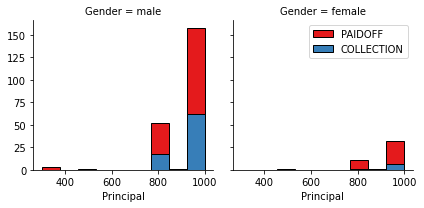

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

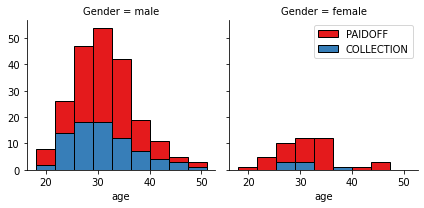

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


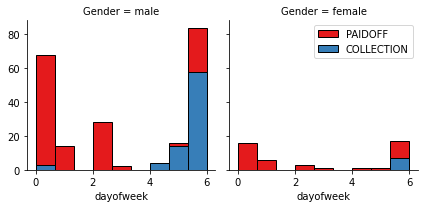

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


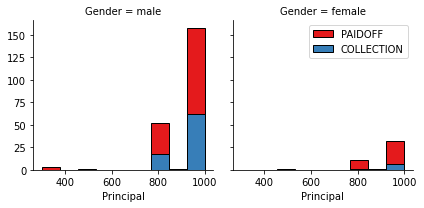

In [12]:
# df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

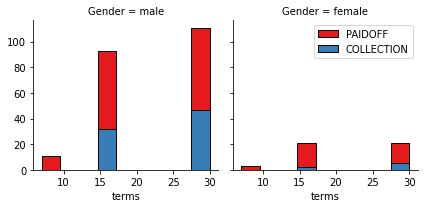

In [13]:
# df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [20]:
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [21]:
# df[['Unnamed: 0']]

In [22]:
from sklearn.preprocessing import LabelEncoder

# colummns_selected = ['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor', 'High School or Below', 'college']
colummns_selected = ['Principal', 'terms', 'age', 'Gender','education', 'weekend']
# colummns_selected = ['Principal', 'terms', 'age', 'Gender','education']
feature_new = df[colummns_selected]

# encoding education columns
# LE = LabelEncoder()
# LE.fit(feature_new['education'])
# edu_encoded = LE.transform(feature_new['education'])
# feature_new[['education']] = edu_encoded.reshape(-1,1)
# feature_new.head()

# Try one-hot encoding
feature_new = df[['Principal', 'terms', 'age', 'Gender','education', 'weekend']]
feature_new = df[['Principal', 'terms', 'age', 'Gender','education']]
# feature_new = df[['Principal', 'terms', 'age', 'Gender','education']]
feature_new = pd.concat([feature_new,pd.get_dummies(df['education'])], axis=1)
feature_new.drop(['education'], axis = 1,inplace=True)
feature_new.head()


,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


In [23]:
# Adding another feature to the model: compute the loan length
# computing loan length
loan_length = df['due_date'] - df['effective_date']
loan_length = loan_length.dt.days
# loan_length.info()

feature_new['loan_length'] = loan_length
feature_new.head()


,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college,loan_length
0,1000,30,45,0,0,1,0,0,29
1,1000,30,33,1,1,0,0,0,29
2,1000,15,27,0,0,0,0,1,14
3,1000,30,28,1,0,0,0,1,29
4,1000,30,29,0,0,0,0,1,29


In [24]:
X = feature_new
X[0:5]


,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college,loan_length
0,1000,30,45,0,0,1,0,0,29
1,1000,30,33,1,1,0,0,0,29
2,1000,15,27,0,0,0,0,1,14
3,1000,30,28,1,0,0,0,1,29
4,1000,30,29,0,0,0,0,1,29


What are our lables?


In [25]:
y = df['loan_status'].values
y[0:5]

# Encode target labels with value between 0 and n_classes-1 via LabelEncoder
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(y)
y_label = LE.transform(y)
y_label = np.asarray(y_label)
# y_label = y_label.reshape(-1,1)
# y_label[0:5]

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [26]:
X= preprocessing.StandardScaler().fit(X).transform(X)
print(X[0:5])
X.shape


[[ 0.51578458  0.92071769  2.33152555 -0.42056004 -0.38170062  1.13639374
  -0.07624929 -0.86968108  0.53257725]
 [ 0.51578458  0.92071769  0.34170148  2.37778177  2.61985426 -0.87997669
  -0.07624929 -0.86968108  0.53257725]
 [ 0.51578458 -0.95911111 -0.65321055 -0.42056004 -0.38170062 -0.87997669
  -0.07624929  1.14984679 -0.88417105]
 [ 0.51578458  0.92071769 -0.48739188  2.37778177 -0.38170062 -0.87997669
  -0.07624929  1.14984679  0.53257725]
 [ 0.51578458  0.92071769 -0.3215732  -0.42056004 -0.38170062 -0.87997669
  -0.07624929  1.14984679  0.53257725]]


(346, 9)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( X, y_label, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


k = 1 Accuracy: train = 0.8478260869565217 test = 0.6285714285714286
k = 2 Accuracy: train = 0.7355072463768116 test = 0.5
k = 3 Accuracy: train = 0.7753623188405797 test = 0.7428571428571429
k = 4 Accuracy: train = 0.7282608695652174 test = 0.6428571428571429
k = 5 Accuracy: train = 0.7753623188405797 test = 0.7571428571428571
k = 6 Accuracy: train = 0.7536231884057971 test = 0.7142857142857143
k = 7 Accuracy: train = 0.7608695652173914 test = 0.7428571428571429
k = 8 Accuracy: train = 0.7644927536231884 test = 0.6857142857142857
k = 9 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 10 Accuracy: train = 0.7246376811594203 test = 0.7428571428571429
k = 11 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 12 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 13 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 14 Accuracy: train = 0.7463768115942029 test = 0.7857142857142857
k = 15 Accuracy: train = 0.7463768115942029 

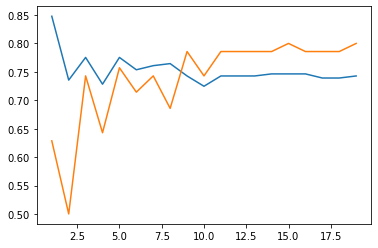

In [28]:
# choose best k for KNN
accuracy = []
for k in np.arange(1,20):
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train,y_train)
    accuracy.append([metrics.accuracy_score(y_train, KNN.predict(X_train)), metrics.accuracy_score(y_test, KNN.predict(X_test))])
    print('k =', k, 'Accuracy: train =', metrics.accuracy_score(y_train, KNN.predict(X_train)), 'test =', metrics.accuracy_score(y_test, KNN.predict(X_test)))

plt.plot(np.arange(1,20), accuracy);

In [29]:
best_k = 9
KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(X_train,y_train)
print('Accuracy: train =', metrics.accuracy_score(y_train, KNN.predict(X_train)), 'test =', metrics.accuracy_score(y_test, KNN.predict(X_test)))

# Once the best parameters for the model has been assessed, train the model with the entire dataset
KNN = KNeighborsClassifier(n_neighbors = best_k)
KNN.fit(X,y_label)
print('Accuracy: overall =', metrics.accuracy_score(y_label, KNN.predict(X)))


Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
Accuracy: overall = 0.7543352601156069


# Decision Tree


k = 3 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 4 Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
k = 5 Accuracy: train = 0.75 test = 0.7857142857142857
k = 6 Accuracy: train = 0.7681159420289855 test = 0.7857142857142857
k = 7 Accuracy: train = 0.782608695652174 test = 0.7428571428571429
k = 8 Accuracy: train = 0.8043478260869565 test = 0.7142857142857143
k = 9 Accuracy: train = 0.8188405797101449 test = 0.7285714285714285
k = 10 Accuracy: train = 0.8333333333333334 test = 0.7714285714285715
k = 11 Accuracy: train = 0.8405797101449275 test = 0.7714285714285715


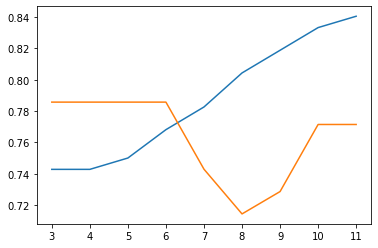

In [30]:
from sklearn.tree import DecisionTreeClassifier

# choose best max_depth
accuracy = []
max_depth = np.arange(3,12)
for k in max_depth:
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = k)
    Tree.fit(X_train,y_train)
    accuracy.append([metrics.accuracy_score(y_train, Tree.predict(X_train)), metrics.accuracy_score(y_test, Tree.predict(X_test))])
    print('k =', k, 'Accuracy: train =', metrics.accuracy_score(y_train, Tree.predict(X_train)), 'test =', metrics.accuracy_score(y_test, Tree.predict(X_test)))

plt.plot(max_depth, accuracy);


Accuracy: train = 0.7681159420289855 test = 0.7857142857142857
Accuracy: overall = 0.7687861271676301


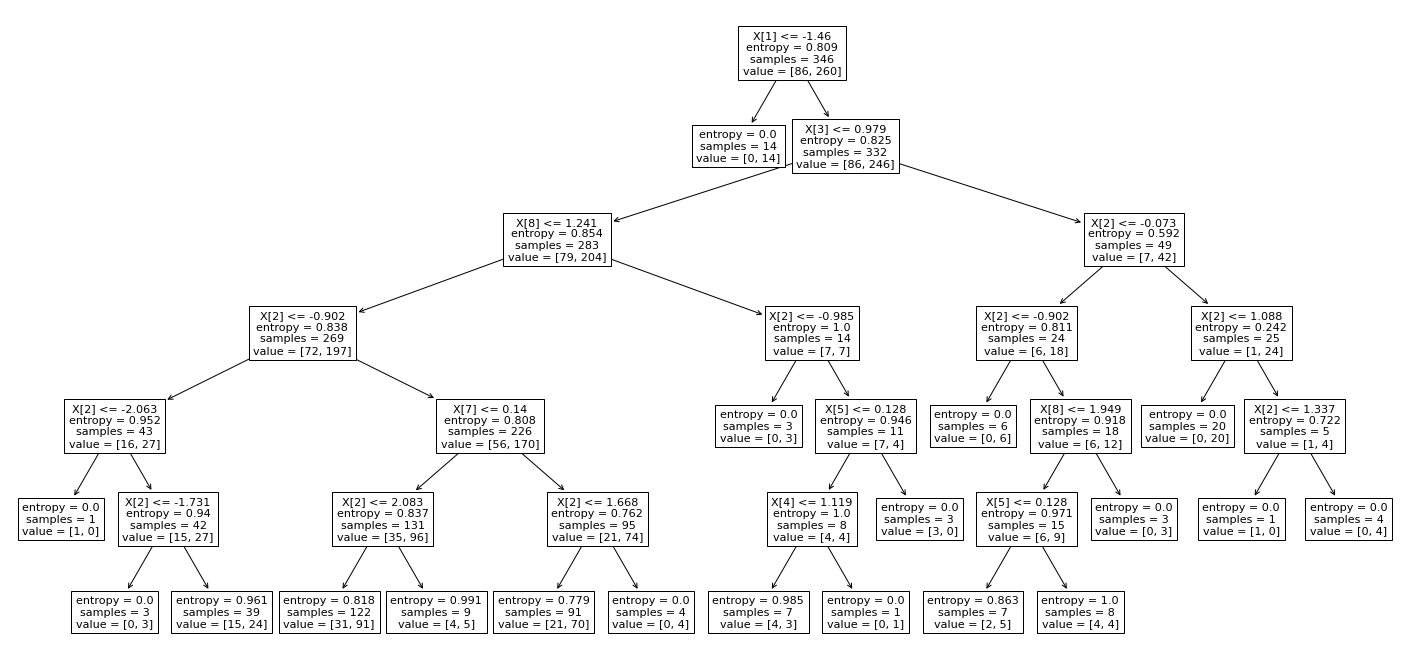

In [31]:
best_max_depth = 6

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_max_depth)
Tree.fit(X_train,y_train)
print('Accuracy: train =', metrics.accuracy_score(y_train, Tree.predict(X_train)), 'test =', metrics.accuracy_score(y_test, Tree.predict(X_test)))

# Once the best parameters for the model has been assessed, train the model with the entire dataset
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_max_depth)
Tree.fit(X, y_label) 
print('Accuracy: overall =', metrics.accuracy_score(y_label, Tree.predict(X)))

# Plot the decision tree
import sklearn.tree as tree
plt.figure(figsize=(25,12))  # set plot size (denoted in inches)
tree.plot_tree(Tree)
plt.show()

# Support Vector Machine


In [32]:
from sklearn import svm

machine = svm.SVC(kernel='rbf')
machine.fit(X_train, y_train) 

print('Accuracy: train =', metrics.accuracy_score(y_train, machine.predict(X_train)), 'test =', metrics.accuracy_score(y_test, machine.predict(X_test)))

# Train the model with the entire dataset
machine = svm.SVC(kernel='rbf')
machine.fit(X, y_label) 
print('Accuracy: overall =', metrics.accuracy_score(y_label, machine.predict(X)))


Accuracy: train = 0.7427536231884058 test = 0.7857142857142857
Accuracy: overall = 0.7543352601156069


# Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression

C = .001
solver = 'liblinear'
# solver = 'saga'
LR = LogisticRegression(C=C, solver=solver).fit(X_train,y_train)
print('Accuracy: train =', metrics.accuracy_score(y_train, LR.predict(X_train)), 'test =', metrics.accuracy_score(y_test, LR.predict(X_test)))

#Train the model with the entire dataset
LR = LogisticRegression(C=C, solver=solver)
LR.fit(X, y_label) 
print('Accuracy: overall =', metrics.accuracy_score(y_label, LR.predict(X)))
print('Accuracy: overall =', metrics.log_loss(y_label, LR.predict_proba(X)))

# print(log_loss(y_label, LR.predict_proba(X)))
# print(np.column_stack([LR.predict(X_train), y_train]))


Accuracy: train = 0.7463768115942029 test = 0.8
Accuracy: overall = 0.7514450867052023
Accuracy: overall = 0.6711551142046273


# Model Evaluation using Test set


In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [35]:
# !wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [36]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
# test_df = df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    54 non-null     int64 
 1   Unnamed: 0      54 non-null     int64 
 2   loan_status     54 non-null     object
 3   Principal       54 non-null     int64 
 4   terms           54 non-null     int64 
 5   effective_date  54 non-null     object
 6   due_date        54 non-null     object
 7   age             54 non-null     int64 
 8   education       54 non-null     object
 9   Gender          54 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [37]:
# day of week
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# change date format
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# convert ['male','female'] to [0,1]
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# select features (colummns_selected defined earlier in model assessment)
feature_new = test_df[['Principal', 'terms', 'age', 'Gender','education']]
# feature_new.head()

# encoding education columns (LabelEncoder)
# LE = LabelEncoder()
# LE.fit(df['education'])
# edu_encoded = LE.transform(feature_new['education'])
# feature_new['education'] = pd.Series(edu_encoded)
feature_new = pd.concat([feature_new,pd.get_dummies(feature_new['education'])], axis=1)
feature_new.drop(['education'], axis = 1,inplace=True)
feature_new.head()

# computing loan length
loan_length = test_df['due_date'] - test_df['effective_date']
loan_length = loan_length.dt.days
feature_new['loan_length'] = loan_length

# Scaling the feature dataset
X = feature_new
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[0:3,:])


[[ 0.49362588  0.92844966  3.05981865  1.97714211  2.39791576 -0.79772404
  -0.19611614 -0.86135677  0.83710306]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054 -0.41702883 -0.79772404
   5.09901951 -0.86135677  0.83710306]
 [ 0.49362588  0.92844966  1.88080596  1.97714211 -0.41702883  1.25356634
  -0.19611614 -0.86135677 -0.95668921]]


In [38]:
# Label encoding of target vector (LabelEncoder)
y = test_df['loan_status'].values
LE = LabelEncoder()
LE.fit(y)
y_label = LE.transform(y)
y_label = np.asarray(y_label)
# y_label

In [39]:
# # accuracy_score
# print('accuracy_score for KNN =            ', metrics.accuracy_score(y_label, KNN.predict(X)))
# print('accuracy_score for Decision Tree =  ', metrics.accuracy_score(y_label, Tree.predict(X)))
# print('accuracy_score SVN =                ', metrics.accuracy_score(y_label, machine.predict(X)))
# print('accuracy_score Logistic Regression =', metrics.accuracy_score(y_label, LR.predict(X)))

In [40]:
# Jaccard Score
print('jaccard_score for KNN =             %0.3f' % jaccard_score(y_label, KNN.predict(X)))
print('jaccard_score for Decision Tree =   %0.3f' % jaccard_score(y_label, Tree.predict(X)))
print('jaccard_score SVN =                 %0.3f' % jaccard_score(y_label, machine.predict(X)))
print('jaccard_score Logistic Regression = %0.3f' % jaccard_score(y_label, LR.predict(X)))

jaccard_score for KNN =             0.741
jaccard_score for Decision Tree =   0.755
jaccard_score SVN =                 0.741
jaccard_score Logistic Regression = 0.741


In [41]:
# f1_score
print('f1_score for KNN =             %0.3f' % f1_score(y_label, KNN.predict(X)))
print('f1_score for Decision Tree =   %0.3f' % f1_score(y_label, Tree.predict(X)))
print('f1_score SVN =                 %0.3f' % f1_score(y_label, machine.predict(X)))
print('f1_score Logistic Regression = %0.3f' % f1_score(y_label, LR.predict(X)))

f1_score for KNN =             0.851
f1_score for Decision Tree =   0.860
f1_score SVN =                 0.851
f1_score Logistic Regression = 0.851


In [42]:
# np.column_stack([LR.predict(X), y_label])

In [43]:
# log_loss
print('log_loss Logistic Regression = %0.3f' % log_loss(y_label, LR.predict_proba(X)))

log_loss Logistic Regression = 0.673


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.741       | 0.851        | NA      |
| Decision Tree      | 0.722       | 0.839        | NA      |
| SVM                | 0.741       | 0.851        | NA      |
| LogisticRegression | 0.741       | 0.851        | 0.673   |

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
